# K Nearest Neigbors 

Today, we will use Python to produce a K-nearest Neigbors algorithm output. We will use various Data Science Packages for importing and cleaning up our data. We then will use Scikit learn packages to both build and test our model.

___

In [2]:
#import packages; typical plots and dataframe packages with data science package for working with tables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datascience import *
plt.style.use('fivethirtyeight')

In [14]:
#Using datascience tables to import csv
ckd = Table.read_table('ckd.csv').relabeled('Blood Glucose Random','Glucose')
ckd

#CKD health data for KNN

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1
68,80,1.01,3,2,normal,abnormal,present,present,157,90,4.1,130,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,1
61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
48,80,1.025,4,0,normal,abnormal,notpresent,notpresent,95,163,7.7,136,3.8,9.8,32,6900,3.4,yes,no,no,good,no,yes,1
69,70,1.01,3,4,normal,abnormal,notpresent,notpresent,264,87,2.7,130,4,12.5,37,9600,4.1,yes,yes,yes,good,yes,no,1
73,70,1.005,0,0,normal,normal,notpresent,notpresent,70,32,0.9,125,4,10,29,18900,3.5,yes,yes,no,good,yes,no,1
73,80,1.02,2,0,abnormal,abnormal,notpresent,notpresent,253,142,4.6,138,5.8,10.5,33,7200,4.3,yes,yes,yes,good,no,no,1
46,60,1.01,1,0,normal,normal,notpresent,notpresent,163,92,3.3,141,4,9.8,28,14600,3.2,yes,yes,no,good,no,no,1


___
Above we the data table that we imported. We have many rows or otherwise called features and they call can be useful to us but we may want to only select a few for our model. Below, we select 3 features to build out model off of. This is using the Data Science Package to select data out. We will then convert the data into a pandas dataframe to work with scikit learn packages. 
___

In [15]:
#we will select out 3 features
ckd = Table().with_columns(
    'Hemoglobin', ckd.column('Hemoglobin'),
    'Glucose', ckd.column('Glucose'),
    'White Blood Cell Count', ckd.column('White Blood Cell Count'),
    'Class', ckd.column('Class')
)
#convert the table to a dataframe to work with other packages
ckd = ckd.to_df()
ckd


,Hemoglobin,Glucose,White Blood Cell Count,Class
0,11.2,117,6700,1
1,9.5,70,12100,1
2,10.8,380,4500,1
3,5.6,157,11000,1
4,7.7,173,9200,1
...,...,...,...,...
153,15.7,140,6700,0
154,16.5,75,7800,0
155,15.8,100,6600,0
156,14.2,114,7200,0


In [16]:
#import scikit learn packages; we have pre processing, train and test split, and KNN algorithm itself.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [18]:
#create a standard scaler variable to apply our function to
scaler = StandardScaler()
#fit the data into the standard function for our data
scaler.fit(ckd.drop('Class', axis = 1))
scaled_features = scaler.transform(ckd.drop('Class', axis = 1))
df_feat = pd.DataFrame(scaled_features,columns=ckd.columns[:-1])
df_feat.head()

,Hemoglobin,Glucose,White Blood Cell Count
0,-0.865744,-0.221549,-0.569768
1,-1.457446,-0.947597,1.162684
2,-1.004968,3.841231,-1.275582
3,-2.814879,0.396364,0.809777
4,-2.083954,0.643529,0.232293


In [19]:
#create a split train and test area for our model to be created and tested on
X_train, X_test, y_train, y_test = train_test_split(scaled_features,ckd['Class'],
                                                    test_size=0.30)

In [20]:
#we will here fit the model to KNN with 1 nearest neighbor
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [22]:
pred = knn.predict(X_test)

In [26]:
#import two funtions to validate our results 
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(y_test,pred))

[[35  0]
 [ 1 12]]


In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.92      0.96        13

    accuracy                           0.98        48
   macro avg       0.99      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



## Choosing a K Value

For the next part, we will fix our model to produce better results with a k value that is other than one in order to get better results. Here we will use the elbow method to pick a good k-value.

In [30]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

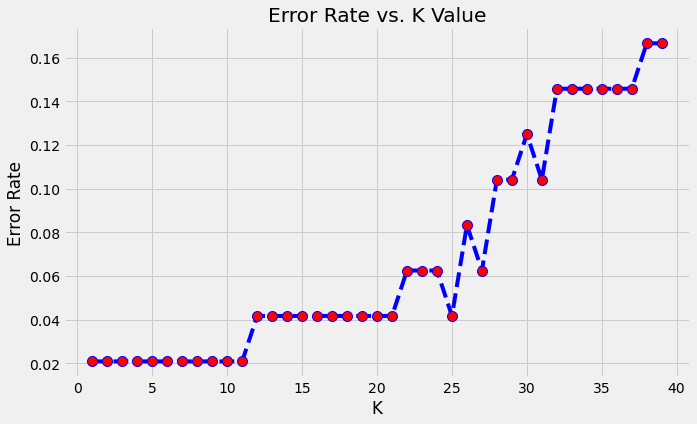

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

When we look at this produced graph of the errors of the k - random selected value, we can see that 1 was already a good k value to choose as it produce the lowest error rate. For this, we do not need to reproduce our model with another value of k since it is already at the point of the lowest error. 

___

As we can see now, K Nearest Neighbor is an easy algorithm to use and can be used to predict correct classifications. In conclusion we can say that: 

**K- Nearest Neighbor**:
- **Easy**: *There is not much setup for the algorithm. We will only select the data and fit it*
- **Multiple Dimensions**: *We can use this at any dimensions and apply the k-nearest neighbor function.*
- **Works much better with finding a K-value**: *Finding a k-value that produced the lowest error will provide the best ourcome.*

___
